
# Master

## task 2:

### Take a picture of a bilboard on the streets of Wuerzburg from a perspective view and overlay another picture on it, like in this tutorial . Both pictures must be taken by you. (easy - 0.75p)


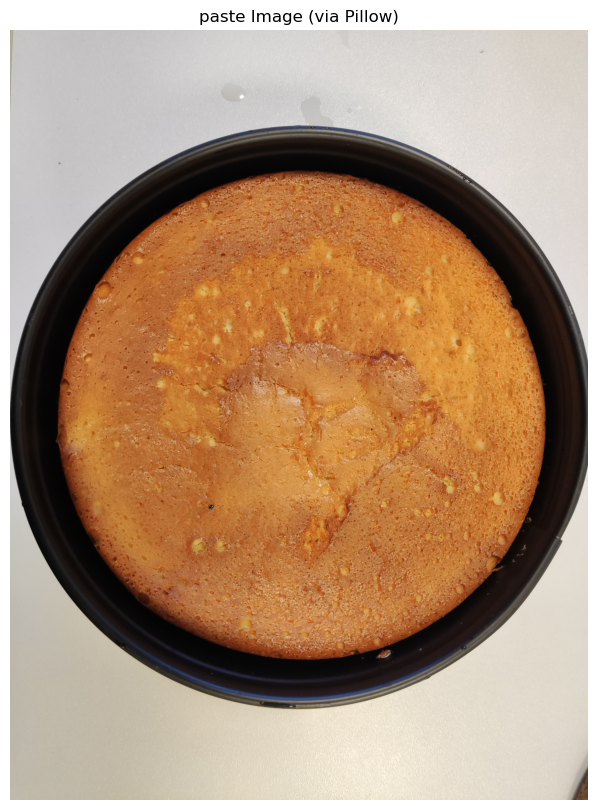

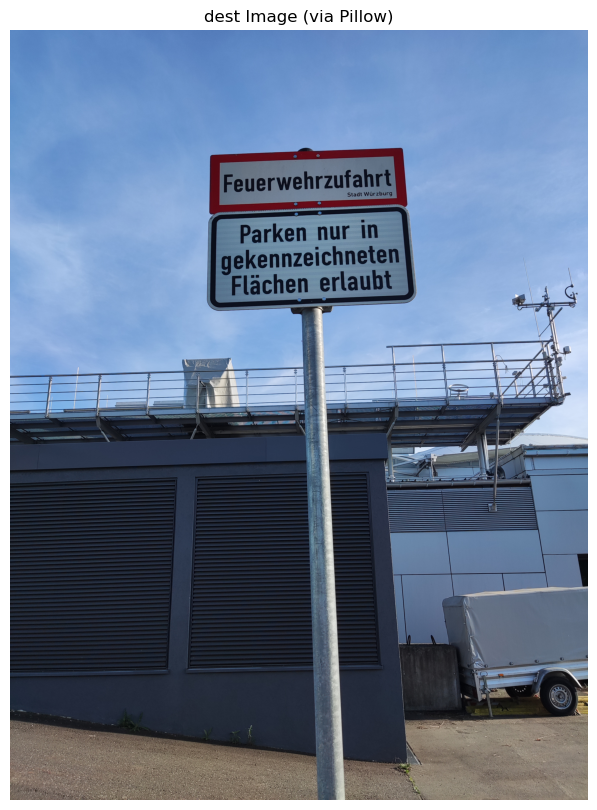

matrix: [[ 3.53388545e-01 -8.26017845e-03  1.03900000e+03]
 [-1.49510023e-02  1.96735951e-01  6.50000000e+02]
 [-2.65191627e-06 -3.44135142e-06  1.00000000e+00]]


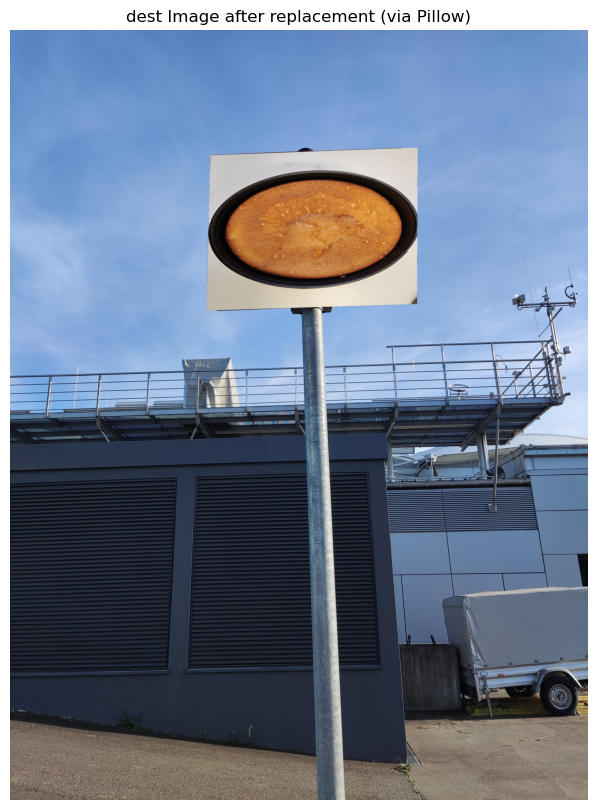

In [14]:
from matplotlib import pyplot as plt
from os import path
# code reference: https://medium.com/@conghung43/image-projective-transformation-with-opencv-python-f0028aaf2b6d
# since the resolutions of photos taken by my phone are too large, I have to scale them down to display on my screen properly
import cv2 as cv2
import numpy as np
from PIL import Image, ImageOps


## code generated by Google aistudio: Gemini 2.5 Pro Preview 03-25
# I don't know how to display my photo taken by my phone which has sRGB color representation property
def display_image(image_np, title='Image'):
    """Displays a NumPy array image using Matplotlib."""
    if image_np is None:
        print("Cannot display None image.")
        return
    if image_np.ndim != 3 or image_np.shape[2] != 3:
        print(f"Image needs to be 3 channels (RGB) for display, but got shape {image_np.shape}")
        # Optionally try grayscale display:
        # plt.imshow(image_np, cmap='gray')
        return
    # Increased size slightly
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image_np)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

if __name__ == '__main__':
    # my own code: use a file path instead fixed string
    task2_dir = "Assets/task2"
    task2_src_image_name = "src_org.jpg"
    src_image_path = path.join(task2_dir, task2_src_image_name)
    # print image
    src_image_pil = Image.open(src_image_path)
    src_image_pil = ImageOps.exif_transpose(src_image_pil)
    image1_np_rgb = np.array(src_image_pil)
    display_image(image1_np_rgb, 'paste Image (via Pillow)')
    # Read source image
    img_src = cv2.imread(src_image_path, cv2.IMREAD_COLOR)
    # cv2.imwrite('source_image.jpg', img_src)
    h, w, c = img_src.shape
    # Get source image parameter: [[left,top], [left,bottom], [right, top], [right, bottom]]
    # here get the whole image as lab code:
    # src_pts = np.float32([[0, 0], [0, test_chart.shape[0]], [test_chart.shape[1], 0], [test_chart.shape[1], test_chart.shape[0]]])
    img_src_coordinate = np.array([[0, 0], [0, h], [w, 0], [w, h]])
    # also use a file path to read destination image
    task2_dest_image_name = "bg_org.jpg"
    dest_image_path = path.join(task2_dir, task2_dest_image_name)
    # print image
    dest_image_pil = Image.open(dest_image_path)
    dest_image_pil = ImageOps.exif_transpose(dest_image_pil)
    image1_np_rgb = np.array(dest_image_pil)
    display_image(image1_np_rgb, 'dest Image (via Pillow)')
    # read background image
    img_dest = cv2.imread(dest_image_path, cv2.IMREAD_COLOR)
    # copy destination image for get_paste_position (Just avoid destination image will be draw)
    img_dest_copy = img_dest.copy()  #np.tile(img_dest, 1)
    # Here I figure out the coordinate by hand
    paste_coordinate = [[1039,650],[1020,1457],[2116,610],[2112,1423]]
    paste_coordinate = np.array(paste_coordinate)

    # Get perspective matrix, describe how to transform the pixels from the source image (img_src) to their new positions
    matrix, _ = cv2.findHomography(img_src_coordinate, paste_coordinate, 0)
    print(f'matrix: {matrix}')
    # use the matrix to do the transformation
    perspective_img = cv2.warpPerspective(img_src, matrix, (img_dest.shape[1], img_dest.shape[0]))
    cv2.copyTo(src=perspective_img, mask=np.tile(perspective_img, 1), dst=img_dest)
    # convert BGR to RGB before displaying
    img_dest_rgb = cv2.cvtColor(img_dest, cv2.COLOR_BGR2RGB)
    display_image(img_dest_rgb, 'dest Image after replacement (via Pillow)')

In [ ]:
# window fails to pop up at chrome
from os import path
# code reference: https://medium.com/@conghung43/image-projective-transformation-with-opencv-python-f0028aaf2b6d
# since the resolutions of photos taken by my phone are too large, I have to scale them down to display on my screen properly
import cv2 as cv2
import numpy as np


# capture mouse motion to find four points that will be replaced by another image
def get_paste_position(event, x, y, flags, paste_coordinate_list):
    cv2.imshow('collect coordinate', img_dest_copy)
    if event == cv2.EVENT_LBUTTONUP:
        # Draw circle right in click position
        cv2.circle(img_dest_copy, (x, y), 2, (0, 0, 255), -1)
        # Append new clicked coordinate to paste_coordinate_list
        paste_coordinate_list.append([x, y])

if __name__ == '__main__':
    # my own code: use a file path instead fixed string
    task2_dir = "Assets/task2"
    task2_src_image_name = "src.jpg"
    src_image_path = path.join(task2_dir, task2_src_image_name)
    # Read source image
    img_src = cv2.imread(src_image_path, cv2.IMREAD_COLOR)
    # cv2.imwrite('source_image.jpg', img_src)
    h, w, c = img_src.shape
    # Get source image parameter: [[left,top], [left,bottom], [right, top], [right, bottom]]
    # here get the whole image as lab code:
    # src_pts = np.float32([[0, 0], [0, test_chart.shape[0]], [test_chart.shape[1], 0], [test_chart.shape[1], test_chart.shape[0]]])
    img_src_coordinate = np.array([[0, 0], [0, h], [w, 0], [w, h]])
    # also use a file path to read destination image
    task2_dest_image_name = "bg.jpg"
    dest_image_path = path.join(task2_dir, task2_dest_image_name)
    img_dest = cv2.imread(dest_image_path, cv2.IMREAD_COLOR)
    # copy destination image for get_paste_position (Just avoid destination image will be draw)
    img_dest_copy = img_dest.copy()  #np.tile(img_dest, 1)
    # use a pop-up window to get coordinate paste_coordinate in destination image
    paste_coordinate = []
    cv2.namedWindow('collect coordinate')
    cv2.setMouseCallback('collect coordinate', get_paste_position, paste_coordinate)
    # wait until click 4 times
    while True:
        cv2.waitKey(1)
        if len(paste_coordinate) == 4:
            break
    paste_coordinate = np.array(paste_coordinate)
    # Get perspective matrix, describe how to transform the pixels from the source image (img_src) to their new positions
    matrix, _ = cv2.findHomography(img_src_coordinate, paste_coordinate, 0)
    print(f'matrix: {matrix}')
    # use the matrix to do the transformation
    perspective_img = cv2.warpPerspective(img_src, matrix, (img_dest.shape[1], img_dest.shape[0]))
    cv2.imshow('img', perspective_img)
    cv2.copyTo(src=perspective_img, mask=np.tile(perspective_img, 1), dst=img_dest)
    cv2.imshow('result', img_dest)
    cv2.waitKey()
    cv2.destroyAllWindows()